### Coding Exercises

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
supermarket = pd.read_csv("supermarket_sales.csv")

In [3]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01/05/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,03/08/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,03/03/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,01/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,02/08/2019,10:37,Ewallet


#### Create bar graph to display total sales by payment method and another bar graph for the total sales by gender.

In [4]:
payment = supermarket.groupby("Payment")
payment.sum()

,Unit price,Quantity,Tax 5%,Total
Payment,,,,
Cash,19525.09,1896.0,5343.170,112206.570
Credit card,16916.68,1722.0,4798.432,100767.072
Ewallet,19230.36,1892.0,5237.767,109993.107


In [5]:
gender = supermarket.groupby("Gender")
gender.sum()

,Unit price,Quantity,Tax 5%,Total
Gender,,,,
Female,27687.24,2869.0,7994.425,167882.925
Male,27984.89,2641.0,7384.944,155083.824


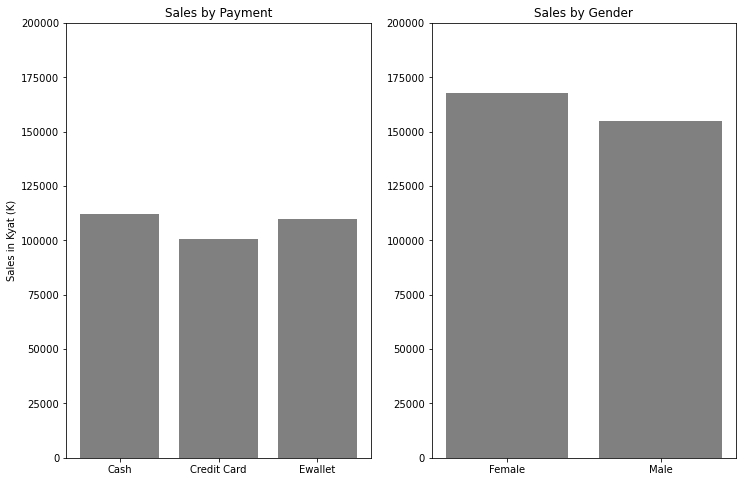

In [10]:
fig = plt.figure(figsize = (12, 8))

#plot 1 
plt.subplot(1, 2, 1)
pcategories = ["Cash", "Credit Card", "Ewallet"]
plt.bar(pcategories, supermarket.groupby(["Payment"]).sum()["Total"], color = "grey")

plt.title("Sales by Payment")
plt.ylabel("Sales in Kyat (K)")
plt.ylim(0, 200000)

#plot 2
plt.subplot(1, 2, 2)
gcategories = ["Female", "Male"]
plt.bar(gcategories, supermarket.groupby(["Gender"]).sum()["Total"], color = "grey")

plt.title("Sales by Gender")
plt.ylim(0, 200000)

plt.show()

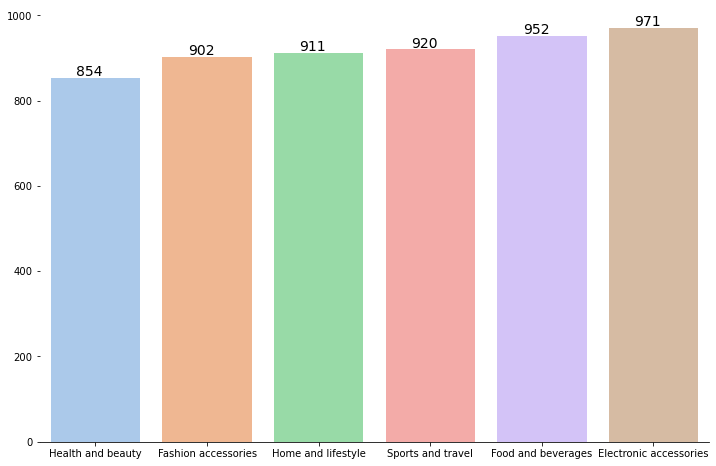

In [14]:
fig = plt.figure(figsize = (12, 8))

product_line = supermarket.groupby("Product line")
quantity = product_line.sum()["Quantity"]

sort_sum = quantity.sort_values(ascending = True)
sort_sum = pd.DataFrame(sort_sum)
sort_sum = sort_sum.reset_index() 

product = sort_sum["Product line"]
quantity = sort_sum["Quantity"]

g = sns.barplot(x = product, y = quantity, palette = "pastel")

for i in ["top", "left", "right"]:
    g.spines[i].set_visible(False)
    
for i in g.patches:
    g.text(i.get_x() + i.get_width() / 3.5, i.get_height() + 5, round(i.get_height()), fontsize = "14")

plt.xlabel("")
plt.ylabel("")
plt.show()    